svm

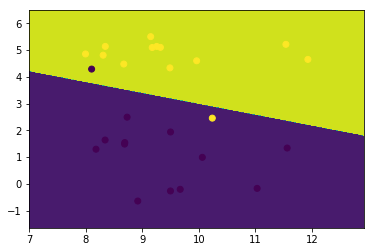

In [2]:
# 原始空间线性可分
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings

warnings.filterwarnings('ignore')

x, y =mglearn.datasets.make_forge()

svc = SVC(kernel='linear').fit(x, y)

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

zz = z.reshape(xx.shape)

plt.contourf(xx, yy, zz)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

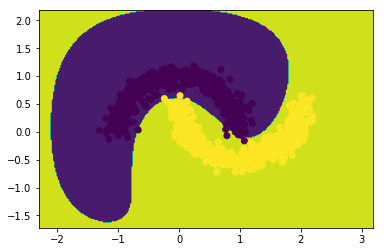

In [3]:
# 非线性
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

# 生成数据
x, y = make_moons(n_samples=1000, noise=0.1, random_state=2)
# 划分训练集、测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.2)

# 转化为多项式特征
x_poly = PolynomialFeatures(degree=2).fit_transform(x_train)

# 模型
svc = SVC(kernel='rbf', gamma=0.1, C=1).fit(x_poly, y_train)

# 可视化分类边界
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

z = svc.predict(PolynomialFeatures(degree=2).fit_transform(np.c_[xx.ravel(), yy.ravel()]))
zz = z.reshape(xx.shape)

plt.contourf(xx, yy, zz)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

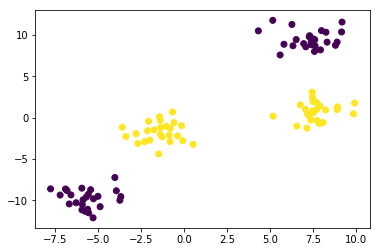

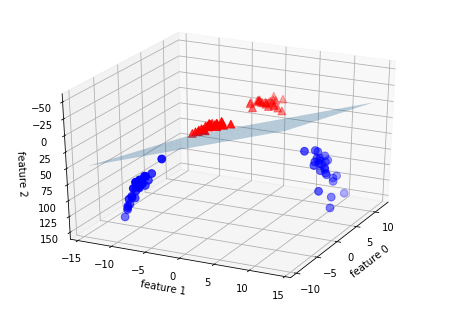

In [4]:
# 特征空间线性可分
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import warnings
from sklearn.svm import LinearSVC
from mpl_toolkits.mplot3d import Axes3D, axes3d

warnings.filterwarnings('ignore')

X, y = mglearn.datasets.make_blobs(centers=4, random_state=8)  # 模拟数据集
y = y % 2  # 二分类

# 原数据
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# 模拟的数据集（二维）是线性不可分的，我们添加一个新的特征,即第二个特征的平方
X_new = np.hstack([X, X[:, 1:]**2])

figure = plt.figure()
# 3D可视化
ax = Axes3D(figure, elev=-152, azim=-26)
# 首先画出所有y==0的点，然后画出所有y==1的点
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 2")

ls3d = LinearSVC().fit(X_new, y)
coef, intercept = ls3d.coef_.ravel(), ls3d.intercept_
# 显示线性决策边界
xx = np.linspace(X_new[:, 0].min()-2, X_new[:, 0].max()+2, 50)
yy = np.linspace(X_new[:, 1].min()-2, X_new[:, 1].max()+2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0]*XX + coef[1]*YY + intercept)/(-coef[2])
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
plt.show()